In [2]:
#load data from database
import sqlite3
import pandas as pd


# Create connection to get data from database created 
conn=sqlite3.connect("economic_db")
gdp_data=pd.read_sql("SELECT * FROM gdp",conn)
unemployment_data=pd.read_sql("SELECT * FROM unemployment",conn)
inflation_data=pd.read_sql("SELECT * FROM inflation",conn)
government_spending_data=pd.read_sql("SELECT * FROM governement_spending",conn)
conn.close()

In [3]:
#Clean and manage data:

gdp_data_last_20years=gdp_data.iloc[-20:]
unemployment_data_last_20years=unemployment_data.iloc[-20:]
inflation_data_last_20years=inflation_data.iloc[-20:]
government_spending_data_last_20years=government_spending_data.iloc[-20:]

#  Rename columns
gdp_data_last_20years.rename(columns={'VALUE': 'GDP'},inplace=True)
unemployment_data_last_20years.rename(columns={'VALUE': 'Unemployment'},inplace=True)
inflation_data_last_20years.rename(columns={'VALUE': 'Inflation'},inplace=True)
government_spending_data_last_20years.rename(columns={'VALUE': 'Government Spending'},inplace=True)

# Extract the year from 'date' column
gdp_data_last_20years['Year'] = pd.to_datetime(gdp_data['date']).dt.year
unemployment_data_last_20years['Year'] = pd.to_datetime(unemployment_data['date']).dt.year
inflation_data_last_20years['Year'] = pd.to_datetime(inflation_data['date']).dt.year
government_spending_data_last_20years['Year'] = pd.to_datetime(government_spending_data['date']).dt.year



C:\Users\hasna\AppData\Local\Temp\ipykernel_21024\3101152672.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data_last_20years.rename(columns={'VALUE': 'GDP'},inplace=True)
C:\Users\hasna\AppData\Local\Temp\ipykernel_21024\3101152672.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment_data_last_20years.rename(columns={'VALUE': 'Unemployment'},inplace=True)
C:\Users\hasna\AppData\Local\Temp\ipykernel_21024\3101152672.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

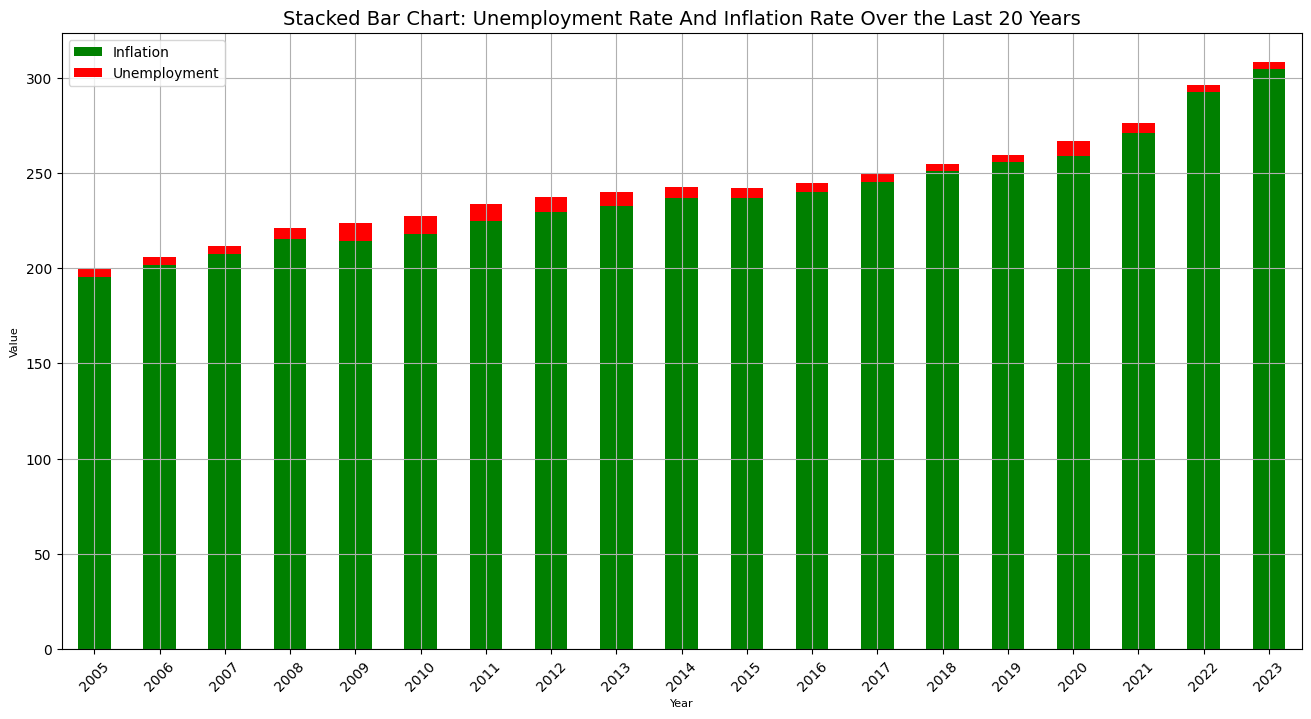

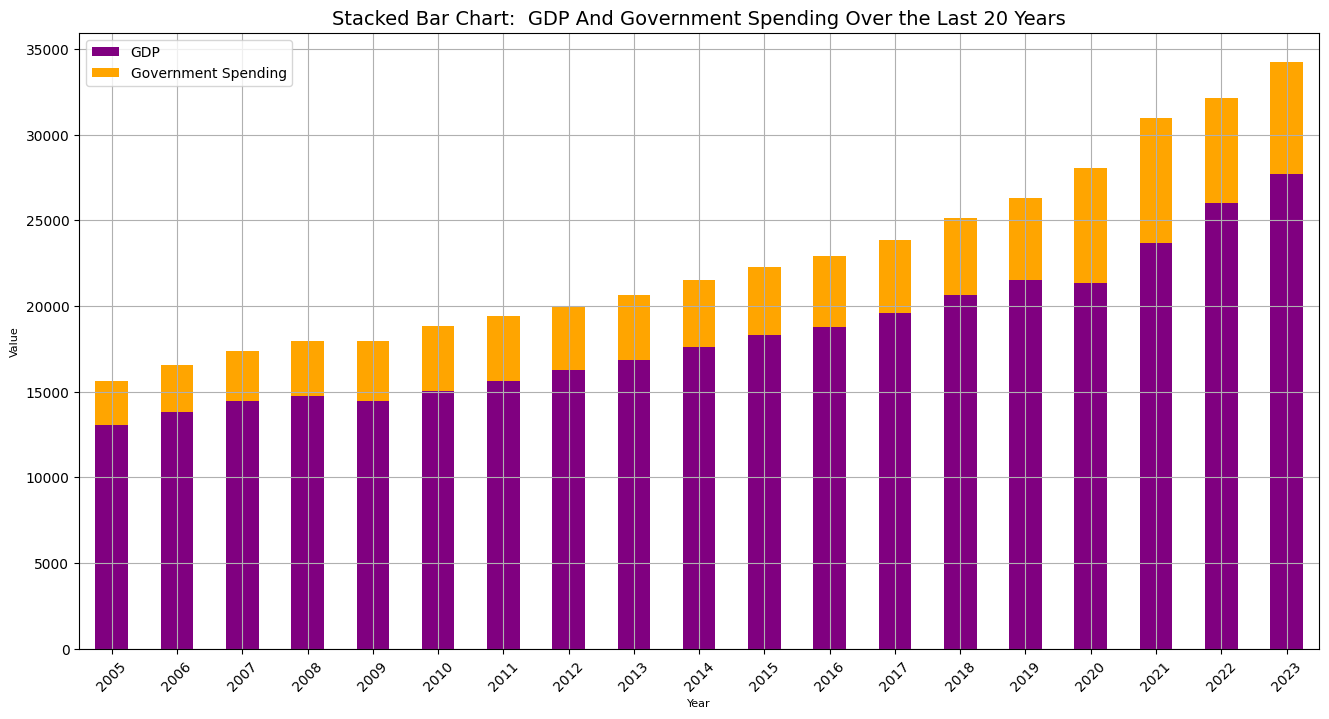

In [4]:
import matplotlib.pyplot as plt


# Merge the data into one dataframe
df_combined_gdp_gs = pd.merge(gdp_data_last_20years[['Year', 'GDP']], government_spending_data_last_20years[['Year', 'Government Spending']], on='Year', how='inner')
df_combined_urate_inflation = pd.merge(inflation_data_last_20years[['Year', 'Inflation']], unemployment_data_last_20years[['Year', 'Unemployment']], on='Year', how='inner')
# Drop rows with NaN values
df_combined_gdp_gs = df_combined_gdp_gs.dropna()
df_combined_urate_inflation=df_combined_urate_inflation.dropna()
df_combined_gdp_gs.set_index('Year', inplace=True)
df_combined_urate_inflation.set_index("Year",inplace=True)
# Plot Unemployment Rate, Inflation Rate as a stacked bar chart
df_combined_urate_inflation.plot(kind='bar',stacked=True,color=['green','red'],figsize=(16,8))
plt.title('Stacked Bar Chart: Unemployment Rate And Inflation Rate Over the Last 20 Years', fontsize=14)
plt.xlabel('Year',fontsize=8)
plt.ylabel('Value',fontsize=8)
plt.legend()
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()
# Plot GDP and Government Spending as a stacked bar chart
df_combined_gdp_gs.plot(kind='bar',stacked=True,color=['Purple','orange','green','red'],figsize=(16,8))
plt.title('Stacked Bar Chart:  GDP And Government Spending Over the Last 20 Years', fontsize=14)
plt.xlabel('Year',fontsize=8)
plt.ylabel('Value',fontsize=8)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Steady Growth :
 Over the past 20 years, both inflation and unemployment have shown a consistent increase, showing a correlation between these two indicators.
  overall these indicators are stable. Their movement shows an absence of a dramatic chnage, Although the years 2020 to 2023 has a big change caused by the COVID-19 pandemic, which significantly impacted the world economy overall.

C:\Users\hasna\AppData\Local\Temp\ipykernel_21024\1457580024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data_last_20years['Year']=pd.to_datetime(gdp_data_last_20years['date']).dt.year
C:\Users\hasna\AppData\Local\Temp\ipykernel_21024\1457580024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data_last_20years['rolling_mean'] = gdp_data_last_20years['GDP'].rolling(window=3).mean()


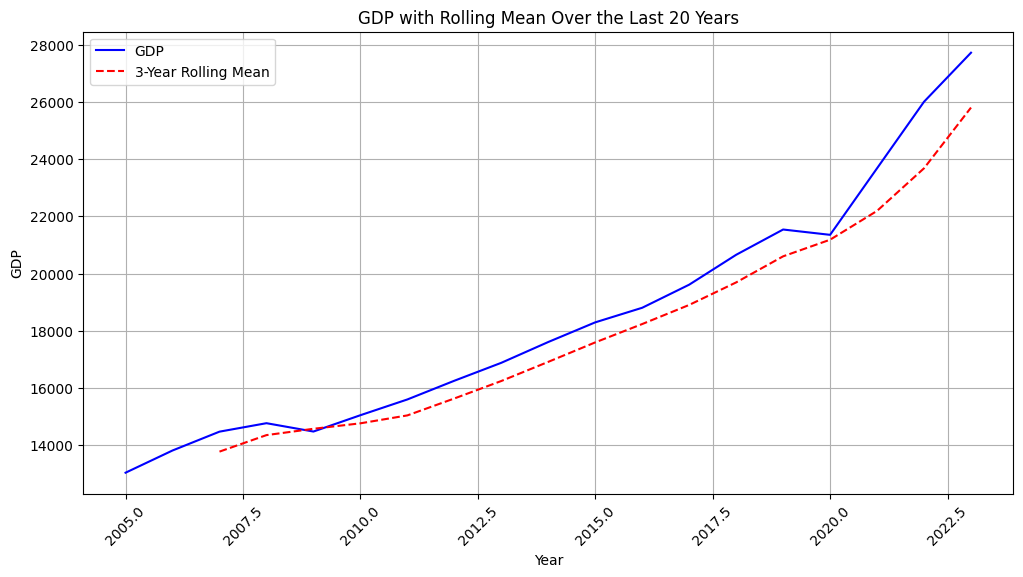

In [5]:
#Rolling Mean/Moving Average
gdp_data_last_20years['Year']=pd.to_datetime(gdp_data_last_20years['date']).dt.year
gdp_data_last_20years['rolling_mean'] = gdp_data_last_20years['GDP'].rolling(window=3).mean()


plt.figure(figsize=(12, 6))
plt.plot(gdp_data_last_20years['Year'], gdp_data_last_20years['GDP'], label='GDP', color='blue')
plt.plot(gdp_data_last_20years['Year'], gdp_data_last_20years['rolling_mean'], label='3-Year Rolling Mean', color='red', linestyle='--')
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP with Rolling Mean Over the Last 20 Years')
plt.legend()
plt.grid()
plt.show()

## GDP Rolling mean
This graph shows that GDP has been steadily increased over the last 20 years, showing the consistent growing of the economy. The 3 year rolling mean  shows short-term changes in the economy. This includes a dip decrease during the 2008 crisis and also a sharp drop in 2020 due to the COVID-19 pandemic, followed by a rapid recovery. The rolling mean confirms the long-term stability and growth of the economy even with these crisices.

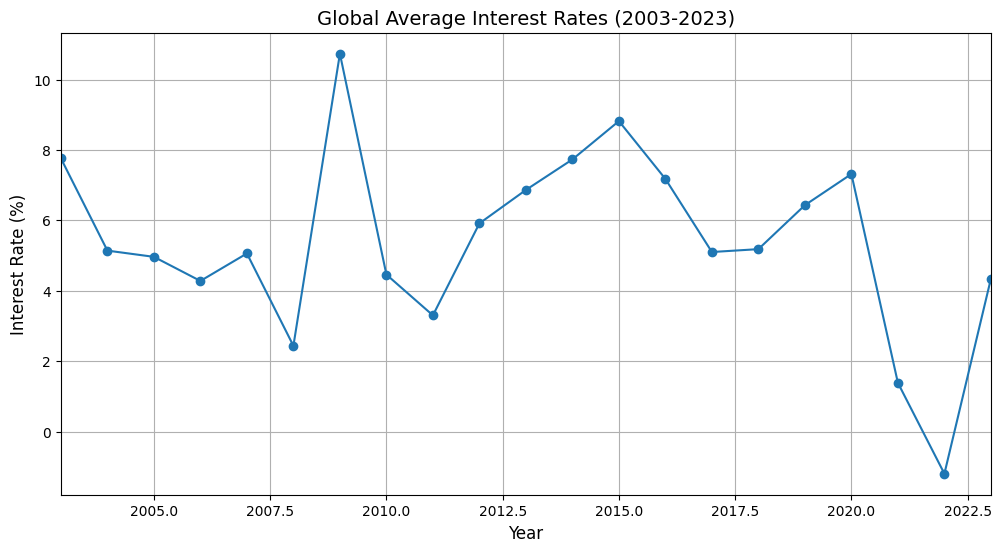

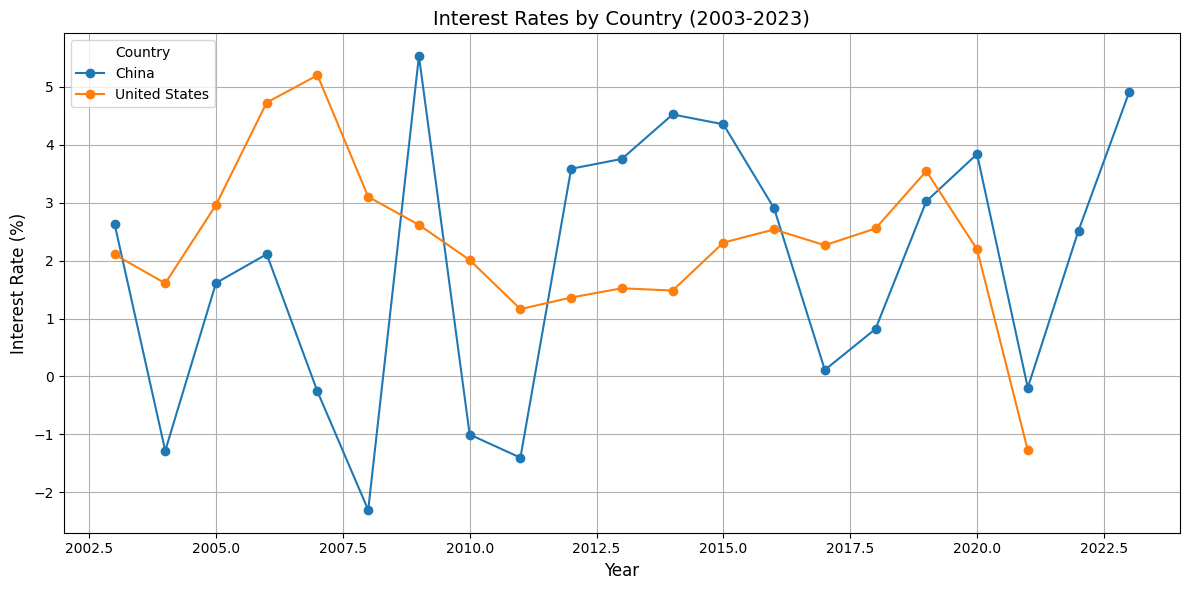

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import data_cleaning

# Get Interest Rate data
interest_rate = data_cleaning.get_interest_rate()

# The world Average Interest Rates Plot
grouped = interest_rate.groupby('Year')['Interest Rate'].mean()
plt.figure(figsize=(12, 6))
plt.plot(grouped.index, grouped.values, marker='o')
plt.title('Global Average Interest Rates (2003-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.xlim(2003,2023)
plt.ylabel('Interest Rate (%)', fontsize=12)
plt.grid(True)
plt.show()

# Interest Rates by Country Plot
selected_countries = ['United States', 'China']
df_filtered = interest_rate[(interest_rate['Country Name']=="United States")|(interest_rate['Country Name']=="China")]

plt.figure(figsize=(12, 6))
for country in df_filtered['Country Name'].unique():
    country_data = df_filtered[df_filtered['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Interest Rate'], marker='o', label=country)

# Customize the plot
plt.title('Interest Rates by Country (2003-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Interest Rate (%)', fontsize=12)
plt.grid(True)
plt.legend(title="Country", loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()





## The Interest Rate China And United States
* Global interest rates changed significantly from 2003 to 2023, peaking above 10% in 2008 and stabilizing around 5% after Cvid-19.

* In 2008, both China and the Unied States had rates near 10%, but after Covid-19, China’s rate remained around 5%, while the US dropped to -1%, showing different economic policies and approches.

## Correlation
Correlation is a measure that shows how two variables are related. It tells us if one variable increases or decreases when the other does the same.

In [7]:
import pandas as pd
import sqlite3
# Filter the Interest Rate to get United States data
interest_rate=interest_rate[interest_rate["Country Name"]=="United States"]
# Merge the interest rate data with the economic data on 'Year'
df_combined = pd.merge(interest_rate, gdp_data_last_20years[['Year', 'GDP']], on='Year', how='inner')
df_combined = pd.merge(df_combined, unemployment_data_last_20years[['Year', 'Unemployment']], on='Year', how='inner')
df_combined = pd.merge(df_combined, inflation_data_last_20years[['Year', 'Inflation']], on='Year', how='inner')
df_combined = pd.merge(df_combined, government_spending_data_last_20years[['Year', 'Government Spending']], on='Year', how='inner')

# Drop rows with NaN values
df_combined = df_combined.dropna()
df_combined_numeric = df_combined.select_dtypes(include=['number'])


# Calculate the correlation matrix
correlation_matrix = df_combined_numeric.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                         Year  Interest Rate       GDP  Unemployment  \
Year                 1.000000      -0.528568  0.981696     -0.194392   
Interest Rate       -0.528568       1.000000 -0.493414     -0.367131   
GDP                  0.981696      -0.493414  1.000000     -0.309653   
Unemployment        -0.194392      -0.367131 -0.309653      1.000000   
Inflation            0.991629      -0.581983  0.982475     -0.166451   
Government Spending  0.869897      -0.631747  0.890351      0.022670   

                     Inflation  Government Spending  
Year                  0.991629             0.869897  
Interest Rate        -0.581983            -0.631747  
GDP                   0.982475             0.890351  
Unemployment         -0.166451             0.022670  
Inflation             1.000000             0.894249  
Government Spending   0.894249             1.000000  


## Interpretation:
* The correlation between GDP and Unemployment is negative -0.081227, it shows that as GDP increases when unemployment  is decreasing (which is a normal economic pattern).
* A positive correlation between Interest Rate and Inflation  0.504603 shows that as interest rates go up, inflation also tends to goes up too.
* A negative correlation between Government Spending and Interest Rate 0.422411 indicates that there is a weak relationship between the two.
